In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
   
    #from sklearn import naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
#     %matplotlib inline

df = pd.read_csv('FinalListPreprocessedData.csv')
df = df.dropna()
X=df['stemming_words']
y=df['LABEL']

print(X)

print(y)

y.value_counts()

df.shape

df.head()

0      හාමුදුරුවරු සියලූම පූජකයන්ගේ මානසික සෞඛ්යය සොය...
1      ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා...
2      කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
3      කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...
4        කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට
                             ...                        
528    කොවිඩ් මරණ කොවිඩ් මරණ සෞඛ්ය සේවා අධ්යක්ෂ ජනරාල...
529               ඉෂාලිනිගේ මරණ පරීක්ෂණයට දේශපාලන බලපෑම්
530    දියණියගේ මරණ පරීක්ෂණය කලේ මුස්ලිම් දොස්තර කෙනෙ...
531    පිරිතෙන් ප්රතිපල ලැබීම එය පුද්ගලයෙකු සජ්ජායනය ...
532    රිෂාඩ් බදියුදීන් හිටපු අමාත්යවරයාගේ නිවසේ ගිනි...
Name: stemming_words, Length: 532, dtype: object
0      Other,Politics
1            Politics
2         Other,Crime
3               Other
4               Other
            ...      
528             Other
529             Crime
530             Crime
531             Other
532             Crime
Name: LABEL, Length: 532, dtype: object


,Unnamed: 0,User,CREATED_AT,LABEL,stemming_words,LIKE COUNT,FOLLOWERS COUNT
0,2,1.420000e+18,7/29/2021 2:40,"Other,Politics",හාමුදුරුවරු සියලූම පූජකයන්ගේ මානසික සෞඛ්යය සොය...,1,1433
1,3,1.420000e+18,7/27/2021 10:40,Politics,ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා...,10,13898
2,4,1.420000e+18,7/25/2021 20:56,"Other,Crime",කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...,0,87
3,5,1.420000e+18,7/25/2021 20:53,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හ...,0,87
4,6,1.420000e+18,7/25/2021 20:52,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට,1,87


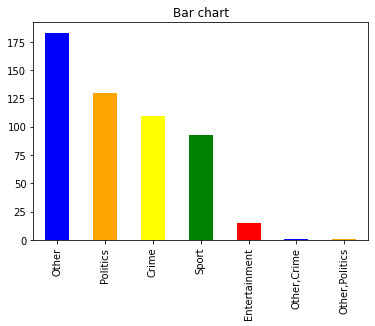

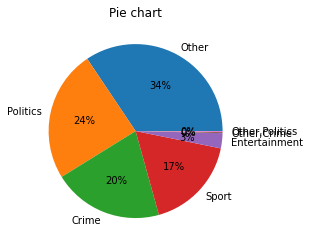

In [2]:
count_Class=pd.value_counts(df["LABEL"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange","yellow","Green","Red"])
plt.title('Bar chart')
plt.show()

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

# SVM

In [3]:
from sklearn.model_selection import train_test_split

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('clf', LinearSVC()),
])
#
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))



[[27  0  1  0  0  5  0]
 [ 0  1  1  0  0  0  3]
 [ 3  0 48  0  0 12  2]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  8  0  0 27  1]
 [ 2  0 10  0  0  4 18]]
                precision    recall  f1-score   support

         Crime       0.82      0.82      0.82        33
 Entertainment       1.00      0.20      0.33         5
         Other       0.69      0.74      0.71        65
   Other,Crime       0.00      0.00      0.00         1
Other,Politics       0.00      0.00      0.00         1
      Politics       0.56      0.73      0.64        37
         Sport       0.75      0.53      0.62        34

      accuracy                           0.69       176
     macro avg       0.55      0.43      0.45       176
  weighted avg       0.70      0.69      0.68       176



# Logestic Regression

In [4]:
from sklearn.model_selection import train_test_split

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

logistic_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('model', LogisticRegression()),
])
#
# Feed the training data through the pipeline
logistic_text_clf.fit(X_train, y_train)

logistic_predictions = logistic_text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,logistic_predictions))

print(metrics.classification_report(y_test,logistic_predictions))



[[26  0  2  0  0  5  0]
 [ 0  0  2  0  0  0  3]
 [ 1  0 54  0  0 10  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 12  0  0 25  0]
 [ 0  0 16  0  0  5 13]]
                precision    recall  f1-score   support

         Crime       0.96      0.79      0.87        33
 Entertainment       0.00      0.00      0.00         5
         Other       0.61      0.83      0.71        65
   Other,Crime       0.00      0.00      0.00         1
Other,Politics       0.00      0.00      0.00         1
      Politics       0.56      0.68      0.61        37
         Sport       0.81      0.38      0.52        34

      accuracy                           0.67       176
     macro avg       0.42      0.38      0.39       176
  weighted avg       0.68      0.67      0.65       176



# Naive Bayes

In [5]:
from sklearn.model_selection import train_test_split

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

NB_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('mnb', MultinomialNB()),
])
#
# Feed the training data through the pipeline
NB_text_clf.fit(X_train, y_train)

NB_predictions = NB_text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,NB_predictions))

print(metrics.classification_report(y_test,NB_predictions))



[[24  0  4  0  0  5  0]
 [ 0  0  2  0  0  0  3]
 [ 1  0 57  0  0  7  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 13  0  0 24  0]
 [ 0  0 25  0  0  2  7]]
                precision    recall  f1-score   support

         Crime       0.96      0.73      0.83        33
 Entertainment       0.00      0.00      0.00         5
         Other       0.55      0.88      0.68        65
   Other,Crime       0.00      0.00      0.00         1
Other,Politics       0.00      0.00      0.00         1
      Politics       0.63      0.65      0.64        37
         Sport       0.70      0.21      0.32        34

      accuracy                           0.64       176
     macro avg       0.41      0.35      0.35       176
  weighted avg       0.65      0.64      0.60       176



# KNN

In [6]:
from sklearn.model_selection import train_test_split

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

KNN_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,3))),
                     ('neigh', KNeighborsClassifier(n_neighbors=3)),
])
#
# Feed the training data through the pipeline
KNN_text_clf.fit(X_train, y_train)
KNN_predictions = KNN_text_clf.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test,KNN_predictions))
print(metrics.classification_report(y_test,KNN_predictions))


[[27  1  3  0  0  2  0]
 [ 0  2  1  0  0  0  2]
 [ 7  2 45  0  0  7  4]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 5  3  8  0  0 19  2]
 [ 7  1 12  0  0  1 13]]
                precision    recall  f1-score   support

         Crime       0.59      0.82      0.68        33
 Entertainment       0.22      0.40      0.29         5
         Other       0.64      0.69      0.67        65
   Other,Crime       0.00      0.00      0.00         1
Other,Politics       0.00      0.00      0.00         1
      Politics       0.63      0.51      0.57        37
         Sport       0.62      0.38      0.47        34

      accuracy                           0.60       176
     macro avg       0.39      0.40      0.38       176
  weighted avg       0.61      0.60      0.59       176



# SGD

In [7]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['stemming_words'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape


sdg = SGDClassifier(max_iter=1000, tol=1e-3)
sdg.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

SDG_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,3))),
                     ('sdg', SGDClassifier(max_iter=1000, tol=1e-3)),
])
#
# Feed the training data through the pipeline
SDG_text_clf.fit(X_train, y_train)
SDG_predictions = SDG_text_clf.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test,SDG_predictions))
print(metrics.classification_report(y_test,SDG_predictions))


[[28  0  0  0  0  5  0]
 [ 0  1  1  0  0  0  3]
 [ 5  0 45  0  0 14  1]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  7  0  0 28  1]
 [ 2  0  9  0  0  5 18]]
                precision    recall  f1-score   support

         Crime       0.78      0.85      0.81        33
 Entertainment       1.00      0.20      0.33         5
         Other       0.70      0.69      0.70        65
   Other,Crime       0.00      0.00      0.00         1
Other,Politics       0.00      0.00      0.00         1
      Politics       0.54      0.76      0.63        37
         Sport       0.78      0.53      0.63        34

      accuracy                           0.68       176
     macro avg       0.54      0.43      0.44       176
  weighted avg       0.70      0.68      0.67       176



In [8]:
predi = KNN_text_clf.predict(["ඔලිම්පික් ක්‍රීඩාවේ නිරත වන්නන් ටෝකියෝ බලා පිටත් වේ"])
print(predi)
predi = KNN_text_clf.predict(["ගුරු වැටුප් විෂමතා වලට විසඳුම් ලැබේ"])
print(predi)
predi = KNN_text_clf.predict([" ටෝකියෝ අත්අඩංගුවට පත්වේ"])
print(predi)

['Sport']
['Crime']
['Crime']
